# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [42]:
pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [43]:
#%pip install --upgrade plotly

### Import Statements

In [44]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [45]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [46]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [47]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [48]:
print(f"1. The data has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")
print(f"2. The column names are: {df_data.columns}")
print(f"3. Any NaN values? {df_data.isna().values.any()}")
print(f"4. Any duplicates? {df_data.duplicated().any()}")

1. The data has 4324 rows and 9 columns.
2. The column names are: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')
3. Any NaN values? True
4. Any duplicates? False


In [49]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [50]:
df_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)  #Remove non-informative columns
df_data.fillna(0, inplace= True)   #Replace NaN with zero

## Descriptive Statistics

In [51]:
df_data['Price'] = df_data['Price'].astype(str).str.replace(',','')
df_data['Price'] = pd.to_numeric(df_data['Price'])

In [52]:
df_data['Rocket_Active_b'] = [True if row == 'StatusActive' else False for row in df_data['Rocket_Status']]

In [53]:
df_data['Price'].describe()

,Price
count,"4,324.00"
mean,34.29
std,150.44
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

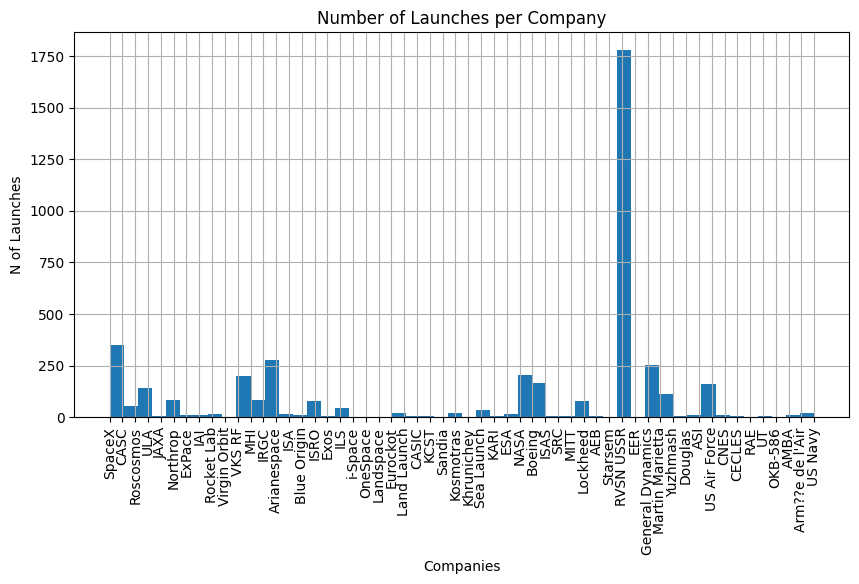

In [54]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.hist(df_data['Organisation'],\
            bins=50)
plt.title('Number of Launches per Company')
plt.xlabel('Companies')
plt.ylabel('N of Launches')
plt.grid()
plt.show()

In [55]:
organisation = df_data['Organisation'].value_counts()

bar = px.bar(x=organisation.index,
             y=organisation.values,
             color=organisation.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Number of Launches per Company')

bar.update_layout(xaxis_title='Companies',
                  yaxis_title='Number of Launches',
                  coloraxis_showscale=False)
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [56]:
status = df_data['Rocket_Status'].value_counts()

bar = px.bar(x=['Retired', 'Active'],
             y=status.values,
             color=status.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Rocket Status')

bar.update_layout(xaxis_title='Status',
                  yaxis_title='Number of Rockets',
                  coloraxis_showscale=False)
bar.show()

In [57]:
fig = px.pie(
    labels=status.index,
    values=status.values,
    title='Rocket Status',
    names = status.index,
    hole=0.4
    )
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [58]:
mission_status = df_data['Mission_Status'].value_counts()

bar = px.bar(x=mission_status.index,
             y=mission_status.values,
             color=mission_status.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Mission Status')

bar.update_layout(xaxis_title='Status',
                  yaxis_title='Number of Rockets',
                  coloraxis_showscale=False)
bar.show()

In [59]:
fig = px.pie(
    labels=mission_status.index,
    values=mission_status.values,
    title='Mission Status',
    names = mission_status.index,
    hole=0.4
    )
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

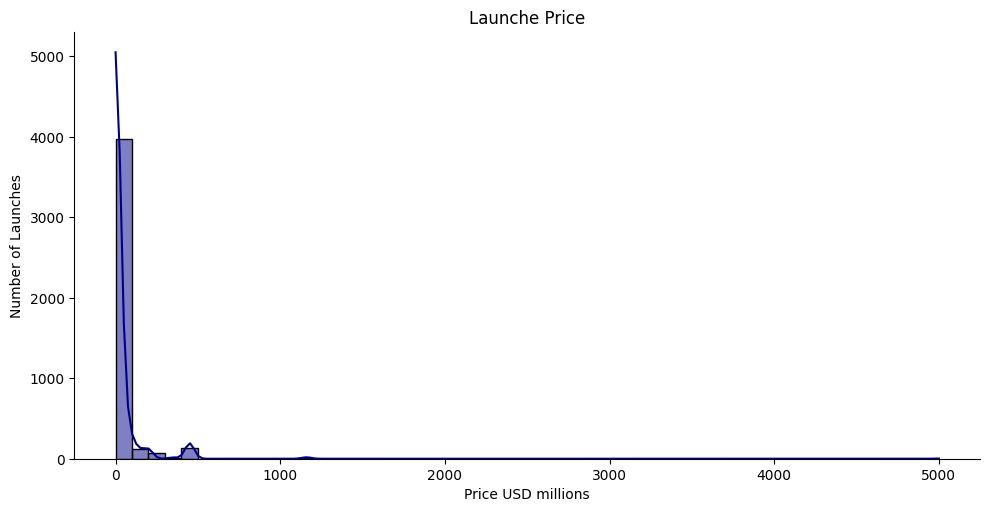

In [60]:
sns.displot(df_data['Price'],
            bins=50,
            aspect=2,
            kde=True,
            color='darkblue')

plt.title('Launche Price')
plt.xlabel('Price USD millions')
plt.ylabel('Number of Launches')

plt.show()

In [61]:
px.histogram(df_data,
             x='Price',
             color='Mission_Status',
             barmode='overlay',
             opacity=0.5,
             nbins=50,
             marginal='box',
             labels={'Price':'Price USD Millions'},
             title='Launches Prices')

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [62]:
# Create a list with 3 letter country codes necessary to create the Choropleth Map

ISO = []
for loc in df_data.Location:
  country = loc.replace(', ',',').split(',')[-1]
  try:
    iso = countries.get(country).alpha3
    ISO.append(iso)
  except:
    ISO.append(f"Not Found: {country}")

df_data['ISO'] = ISO

In [63]:
# Check countries with name different from the ISO standard

df_data['ISO'][df_data['ISO'].str.contains("Not Found")].unique()

array(['Not Found: Russia', 'Not Found: Shahrud Missile Test Site',
       'Not Found: Iran', 'Not Found: New Mexico',
       'Not Found: Yellow Sea', 'Not Found: North Korea',
       'Not Found: Pacific Missile Range Facility',
       'Not Found: Pacific Ocean', 'Not Found: South Korea',
       'Not Found: Barents Sea', 'Not Found: Gran Canaria'], dtype=object)

In [64]:
#list(countries)
names_to_replace = {'Not Found: Russia':'Russian Federation',
                    'Not Found: Shahrud Missile Test Site':'Iran, Islamic Republic of',
                    'Not Found: Iran':'Iran, Islamic Republic of',
                    'New Mexico':'USA',
                    'Not Found: Yellow Sea':'China',
                    'Not Found: North Korea':"Korea, Democratic People's Republic of",
                    'Not Found: Pacific Missile Range Facility':'USA',
                    'Not Found: Pacific Ocean':'Ukraine',
                    'Not Found: South Korea':'Korea, Republic of',
                    'Not Found: Barents Sea':'Russian Federation',
                    'Not Found: Gran Canaria':'USA',
                     }

In [65]:
# Update countries ISO field in the database:
ISO_v2 = []
for iso in ISO:
  for nf_name, new_name in names_to_replace.items():
    if nf_name in iso:
      country_name = countries.get(new_name).alpha3
      break
    else:
      country_name = iso
  ISO_v2.append(country_name)

df_data['ISO'] = ISO_v2

In [66]:
iso_data = df_data['ISO'].value_counts()
iso_data = iso_data.reset_index()
iso_data.rename(columns={'count':'nr_launches'}, inplace=True)
iso_data

,ISO,nr_launches
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,269
5,JPN,126
6,IND,76
7,UKR,36
8,IRN,14
9,NZL,13


In [67]:
world_map = px.choropleth(iso_data,
                          locations='ISO',
                          color='nr_launches',
                          hover_name='nr_launches',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [68]:
print(f"Mission_Status options: {df_data['Mission_Status'].unique()}")

df_data['Failure'] = df_data['Mission_Status'].apply(lambda x: 1 if (x=='Failure' or x=='Prelaunch Failure' or x=='Partial Failure') else 0)
failures = df_data.groupby(['ISO'], as_index=False).agg({'Failure': pd.Series.sum})
failures

Mission_Status options: ['Success' 'Failure' 'Prelaunch Failure' 'Partial Failure']


,ISO,Failure
0,AUS,3
1,BRA,3
2,CHN,25
3,FRA,18
4,IND,13
5,IRN,9
6,ISR,2
7,JPN,13
8,KAZ,93
9,KEN,0


In [69]:
#Validating the failues table:
df_data[((df_data['Mission_Status']=='Failure') | (df_data['Mission_Status']=='Prelaunch Failure') | (df_data['Mission_Status']=='Partial Failure')) & (df_data['ISO']=='BRA')]
df_data[((df_data['Mission_Status']=='Failure') | (df_data['Mission_Status']=='Prelaunch Failure') | (df_data['Mission_Status']=='Partial Failure')) & (df_data['ISO']=='JPN')]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Rocket_Active_b,ISO,Failure
377,JAXA,"Uchinoura Space Center, Japan","Sat Jan 14, 2017 23:33 UTC",SS-520 | TRICOM-1,StatusActive,0.00,Failure,True,JPN,1
1018,MHI,"LA-Y1, Tanegashima Space Center, Japan","Sat Nov 29, 2003 04:33 UTC","H-IIA 2024 | IGS-Optical (2), IGS-Radar (2)",StatusRetired,0.00,Failure,False,JPN,1
1207,ISAS,"Mu Pad, Uchinoura Space Center, Japan","Thu Feb 10, 2000 01:30 UTC",Mu-V / M-24 | Astro E,StatusRetired,0.00,Failure,False,JPN,1
1227,MHI,"LA-Y1, Tanegashima Space Center, Japan","Mon Nov 15, 1999 07:29 UTC",H-IIS | Himawari 6,StatusRetired,0.00,Failure,False,JPN,1
1329,MHI,"LA-Y1, Tanegashima Space Center, Japan","Sat Feb 21, 1998 07:55 UTC",H-II | Kakehashi,StatusRetired,0.00,Partial Failure,False,JPN,1
1528,ISAS,"Mu Pad, Uchinoura Space Center, Japan","Sun Jan 15, 1995 13:45 UTC",Mu-III S2 | EXPRESS,StatusRetired,0.00,Partial Failure,False,JPN,1
2532,MHI,"LA-Y1, Tanegashima Space Center, Japan","Tue Feb 06, 1979 08:46 UTC",N-I Star-37E | Ayame 1,StatusRetired,0.00,Partial Failure,False,JPN,1
2849,ISAS,"Mu Pad, Uchinoura Space Center, Japan","Wed Feb 04, 1976 05:00 UTC",Mu-III C | Corsa A,StatusRetired,0.00,Failure,False,JPN,1
3432,ISAS,"Mu Pad, Uchinoura Space Center, Japan","Tue Sep 22, 1970 05:00 UTC",Mu-IV S | Shinsei,StatusRetired,0.00,Failure,False,JPN,1
3529,UT,"Uchinoura Space Center, Japan","Mon Sep 22, 1969",Lambda-IV S | Osumi,StatusRetired,0.00,Failure,False,JPN,1


In [70]:
world_map = px.choropleth(failures,
                          locations='ISO',
                          color='Failure',
                          hover_name='Failure',
                          color_continuous_scale=px.colors.sequential.matter,
                          title='Launche Failures per Country')

world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [71]:
country_org_status = df_data.groupby(by=['ISO',
                                       'Organisation',
                                       'Mission_Status'], as_index=False).agg({'Rocket_Status': pd.Series.count})
country_org_status = country_org_status.rename(columns={'Rocket_Status': 'N_Launches'})
country_org_status

,ISO,Organisation,Mission_Status,N_Launches
0,AUS,AMBA,Success,1
1,AUS,CECLES,Failure,2
2,AUS,CECLES,Success,1
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [72]:
burst = px.sunburst(country_org_status,
                    path=['ISO', 'Organisation', 'Mission_Status'],
                    values='N_Launches',
                    title='Launches to Space',
                   )
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [73]:
org_expenses = df_data.groupby('Organisation', as_index=False).agg({'Price': pd.Series.sum})
org_expenses.sort_values('Price', ascending=False, inplace=True)

org_expenses.head(10)

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


In [74]:
# Data validation:
df_data[df_data['Organisation']=='Rocket Lab']['Price'].sum() == 13*7.5

True

In [75]:
bar = px.bar(x=org_expenses.Organisation,
             y=org_expenses.Price,
             color=org_expenses.Price,
             color_continuous_scale=px.colors.sequential.haline,
             title='Total Money Spent by Organisation in Space Missions')

bar.update_layout(xaxis_title='Organisation',
                  yaxis_title='Price in USD million',
                  coloraxis_showscale=False)
bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [76]:
org_price = df_data[df_data['Price'] != 0]
org_price = org_price.groupby('Organisation')['Price'].mean().reset_index().sort_values('Price', ascending=False)
fig = px.bar(org_price, x='Organisation', y='Price', title='Mean Value Spent by Organisation')
fig.update_layout(yaxis_title='Mean Value in USD Millions')
fig.show()

In [77]:
fig = px.bar(df_data.sort_values('Price'),
       x='Organisation',
       y='Price',
       title='Money Spent by Organisation per Launch')

fig.update_layout(yaxis_title='Price in USD Millions')
fig.show()

In [78]:
prices_unique = df_data.groupby('Organisation')['Price'].unique().reset_index()
prices_flat = prices_unique.explode('Price')

In [79]:
fig = px.scatter(prices_flat, x='Organisation', y='Price', title='Unique Prices by Organisation')
fig.show()

# Chart the Number of Launches per Year

In [80]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='mixed', utc=True)
df_data['Year'] = df_data['Date'].dt.year

In [81]:
launches_year = df_data.groupby('Year').size().reset_index(name='Launch_Count')

fig = px.bar(launches_year, x='Year', y='Launch_Count', title='Number of Launches per Year')
fig.update_xaxes(tickmode='linear')
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [97]:
df_data['Month'] = df_data['Date'].dt.strftime('%Y-%m')
launches_month = df_data.groupby('Month').size().reset_index(name='Launch_Count')

rolling_average = launches_month['Launch_Count'].rolling(window=2).mean()

fig=px.scatter(launches_month, x=launches_month.Month, y=launches_month.Launch_Count, title='Launches per Month')
fig.add_scatter(x=launches_month['Month'],y=rolling_average, mode='lines', name='Rolling Average')
fig.update_layout(xaxis_title='Month',yaxis_title='Number of Launches')

#year_ticks = [date for date in launches_month['Month'] if date.endswith('-01')]
#fig.update_xaxes(tickvals=launches_month['Month'], ticktext=[date if date in year_ticks else '' for date in launches_month['Month']])

fig.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [82]:
df_data

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

> Add blockquote



## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?